<a href="https://colab.research.google.com/github/vishal786-commits/machine-learning-journey/blob/main/classical-ml/linear-regression-from-first-principles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Author: Vishal Gopalkrishna**

# **Linear Regression — From First Principles**

---



# **What is Supervised Learning?**


Supervised learning is a type of machine learning where:

* We work with **input–output pairs**.
* The model learns a relationship (or mapping function) from inputs to outputs.

Formally, we aim to learn a function:

$$
f : \mathcal{X} \rightarrow \mathcal{Y}
$$

Where:

* $\mathcal{X}$ represents the feature space (independent variables),
* $\mathcal{Y}$ represents the target space (dependent variable).

Given training data:

$$
{(x_1, y_1), (x_2, y_2), \dots, (x_m, y_m)}
$$

our goal is to construct a function $f$ such that, for a new unseen input $x_{\text{new}}$, the model produces a good prediction:

$$
\hat{y} = f(x_{\text{new}})
$$

---

### **Example**

Suppose we want to predict house prices based on area.

We learn a function:

$$
f : \text{Area} \rightarrow \text{Price}
$$

using historical data.

Once trained, the model can take a new area value and produce a predicted house price:

$$
\hat{\text{Price}} = f(\text{Area}_{\text{new}})
$$

Thus, supervised learning is the process of learning a predictive function from labeled examples so that it generalizes well to unseen data.

---


# **What Is Linear Regression?**

Linear Regression models the relationship between input features and the target variable using a linear function.

For a single feature ($ x $), the model is defined as:

$$
\hat{y} = wx + b
$$

Where:

* ($ w $) is the **weight** (slope of the line),
* ($ b $) is the **bias** (intercept),
* ($ \hat{y} $) is the **predicted value**.

---

### **Objective**

Given training data:

$$
{(x_1, y_1), (x_2, y_2), \dots, (x_m, y_m)}
$$

our goal is to find parameters ($ w $) and ($ b $) such that the predictions ($ \hat{y}_i $) are as close as possible to the true values ($ y_i $).

In other words, we aim to solve:

$$
\min_{w, b} ; L(w, b)
$$

where ($ L(w, b) $) measures the prediction error.

---

### **Key Idea**

Linear Regression is distinct because it restricts the model to a **straight-line relationship** between inputs and outputs.

Unlike other algorithms that may use curves, decision rules, or complex nonlinear patterns, Linear Regression searches for the best-fitting straight line that predicts a continuous numerical value.




# **Creating a Realistic Synthetic Dataset**(Optional)

Instead of using a real or anonymized dataset, we generate data from a known linear process.

This approach allows us to:

* Clearly understand the underlying concept,
* Observe the convergence behavior of our model,
* Compare the learned parameters with the true parameters.

---

### **True Underlying Model**

Assume the data is generated according to:

$$
y = 3x + 7 + \varepsilon
$$

Where:

* The true weight ( $w^* = 3$ ),
* The true bias ($ b^* = 7$ ),
* ( $\varepsilon \sim \mathcal{N}(0, \sigma^2) $) represents Gaussian noise.

---

Here:

* ($ \varepsilon $) captures randomness or measurement error,
* ($ \mathcal{N}(0, \sigma^2) $) denotes a normal distribution with mean ($ 0$ ) and variance ($ \sigma^2 $).

Thus, the observed data is not perfectly linear, but centered around the true linear relationship.





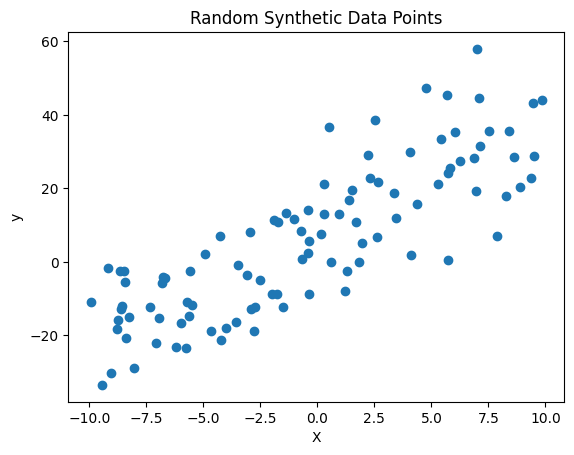

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1997)  # for reproducibility

# Number of data points
m = 100

# Generate feature values
X = np.random.uniform(-10, 10, m)

# True parameters
true_w = 3
true_b = 7

# Add Gaussian noise
noise = np.random.normal(0, 10, m)

# Generate data points
y = true_w * X + true_b + noise

# Visualize
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Random Synthetic Data Points")
plt.show()

Now we have a dataset where, for each value of x in the range [-10, 10], there is a corresponding y value.

Our goal is to learn the main pattern or underlying relationship between x and y so that we can predict the output for unseen inputs — for example, estimating y when x = 11 or even x = -11.

---

Before we proceed to build the linear model,
We will split this dataset into traning and test data:

- Training set → Used to learn parameters (w, b)
- Test set → Used to evaluate performance on unseen data

In [3]:
# Train/Test Split
from sklearn.model_selection import train_test_split

# reshape because sklearn expects 2D features
X_reshaped = X.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(
    X_reshaped, y, test_size=0.2, random_state=123
)

print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])

Train size: 80
Test size: 20


# **Goal of Linear Regression**


The objective of Linear Regression is to estimate the optimal parameters
($ (w, b) $) that best describe the relationship between the input features and the target variable.

In simple terms, we want to find the straight line that fits the data best — the one that stays as close as possible to all observed data points overall.

---

###** Model Representation**

A straight line is defined by:

$$
\hat{y} = wx + b
$$

Where:

* ($ w $) is the weight (slope),
* ($ b $) is the bias (intercept),
* ($ \hat{y} $) is the predicted value.

However, the true values of ($ w $) and ($ b $) are unknown.

---

### **Given Training Data**

We are provided with:

$$
X = {x_1, x_2, \dots, x_m}
$$

$$
y = {y_1, y_2, \dots, y_m}
$$

Our goal is to estimate parameters ($ w $) and ($ b $) that minimize the prediction error.

---

### **Minimizing Prediction Error**

For each training example:

* The actual value is ($ y_i $),
* The predicted value is ($ \hat{y}_i = w x_i + b $).

We aim to minimize the overall difference between:

$$
y_i \quad \text{and} \quad \hat{y}_i
$$

across all training samples.

In other words, we are searching for the parameters ($ w $) and ($ b $) that make the line as close as possible to the observed data.

---

### **Final Goal**

Once we obtain the optimal parameters:

$$
(w^*, b^*)
$$

we can use the learned model to make predictions on unseen inputs:

$$
\hat{y}*{\text{new}} = w^* x*{\text{new}} + b^*
$$

Thus, Linear Regression is fundamentally the problem of finding the best-fitting line by minimizing prediction error.




# **Visualizing Different Lines by Changing Weights**

To understand what "best fit" means, we will:

- Plot 6 different lines on the same dataset
- **Each line uses a different $(w, b)$**
- One line will be close to the true parameters
- The others will clearly underfit or misfit

We will also compute the MSE for each line.

This helps us visually and mathematically understand
why some parameter choices are better than others.

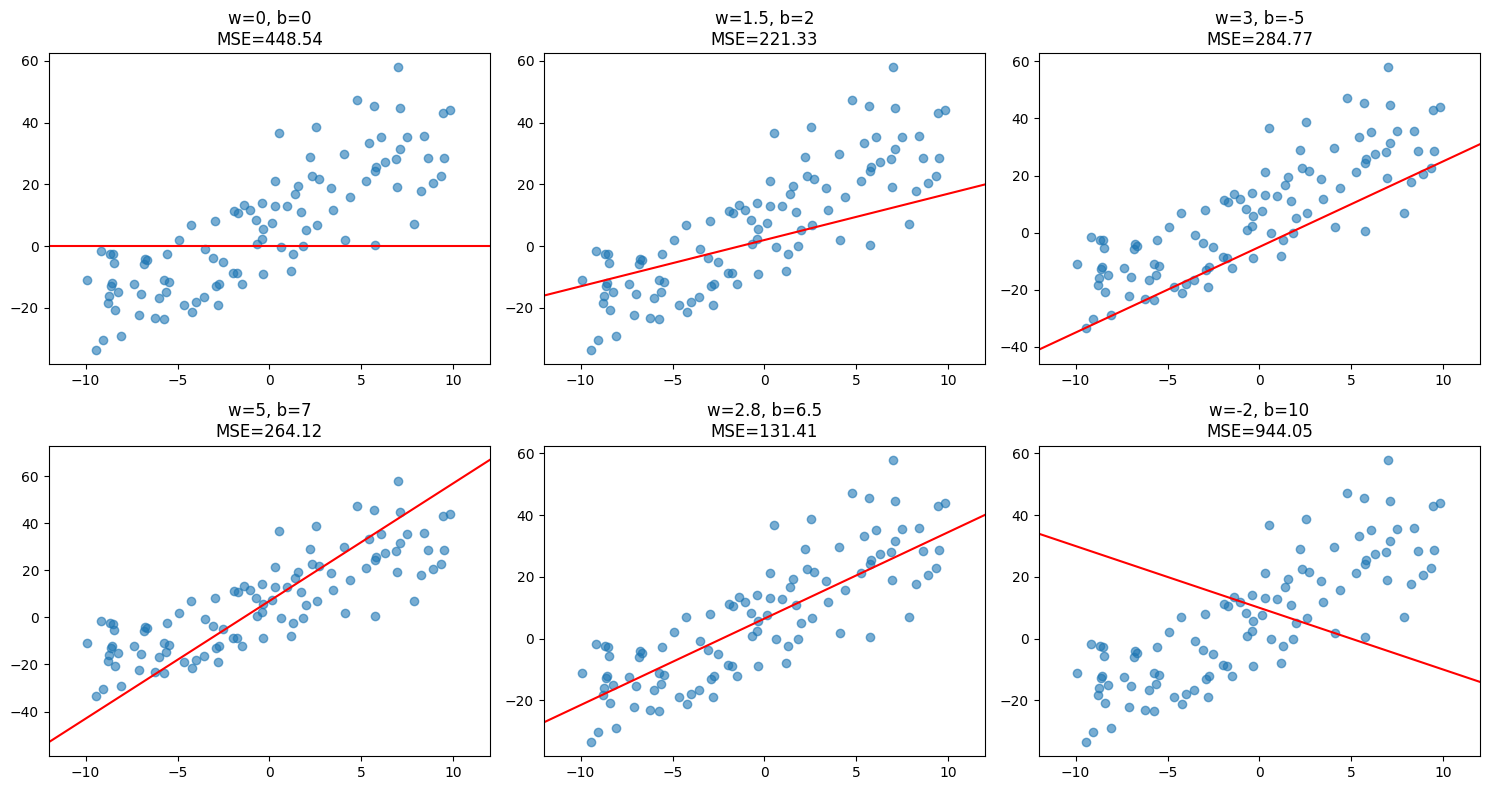

In [4]:
# Candidate parameter sets
parameter_sets = [
    (0, 0),          # very poor fit
    (1.5, 2),        # weak slope
    (3, -5),         # correct slope, wrong intercept
    (5, 7),          # too steep
    (2.8, 6.5),      # close to true (3, 7) but not exact
    (-2, 10)         # completely wrong direction
]

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.ravel()

m = len(X)

for i, (w, b) in enumerate(parameter_sets):
    ax = axes[i]

    y_pred = w * X + b
    loss = (1/m) * np.sum((y - y_pred)**2)

    x_line = np.linspace(-12, 12, 100)
    y_line = w * x_line + b

    ax.scatter(X, y, alpha=0.6)
    ax.plot(x_line, y_line, color="red")
    ax.set_title(f"w={w}, b={b}\nMSE={loss:.2f}")
    ax.set_xlim(-12, 12)

plt.tight_layout()
plt.show()

Observe:

- Some lines clearly do not represent the data pattern.
- Some lines are closer to the overall trend.
- The line with the smallest MSE is the best fit among these candidates.

This demonstrates that:

"Best line" does not mean passing through every point.
It means minimizing the overall squared error across all data points.

# **Loss Function (Mean Squared Error)**

**Mean Squared Error (MSE)** is the average of how far our predictions are from the real answers.


We define the loss using **Mean Squared Error (MSE)**:

---

$$
L(w, b) = \frac{1}{m} \sum_{i=1}^{m} (y_i - \hat{y}_i)^2
$$

Substituting the prediction $\hat{y}_i = w x_i + b$:

$$
L(w, b) = \frac{1}{m} \sum_{i=1}^{m} \left(y_i - (w x_i + b)\right)^2
$$

---

### Why do we square the errors?

- It penalizes larger errors more heavily.
- It ensures the loss is always non-negative.
- It is differentiable, which makes optimization using gradient descent possible.

---

*(Now observe the errors (MSE values) for each of the six lines above. Which line appears to follow the overall trend of the data most closely?)*

The line that best represents the data will not necessarily pass through every point, but it will have the smallest overall error — meaning its predictions stay closest to the data on average.

# **Gradient Descent - Intuition Behind Minimization**

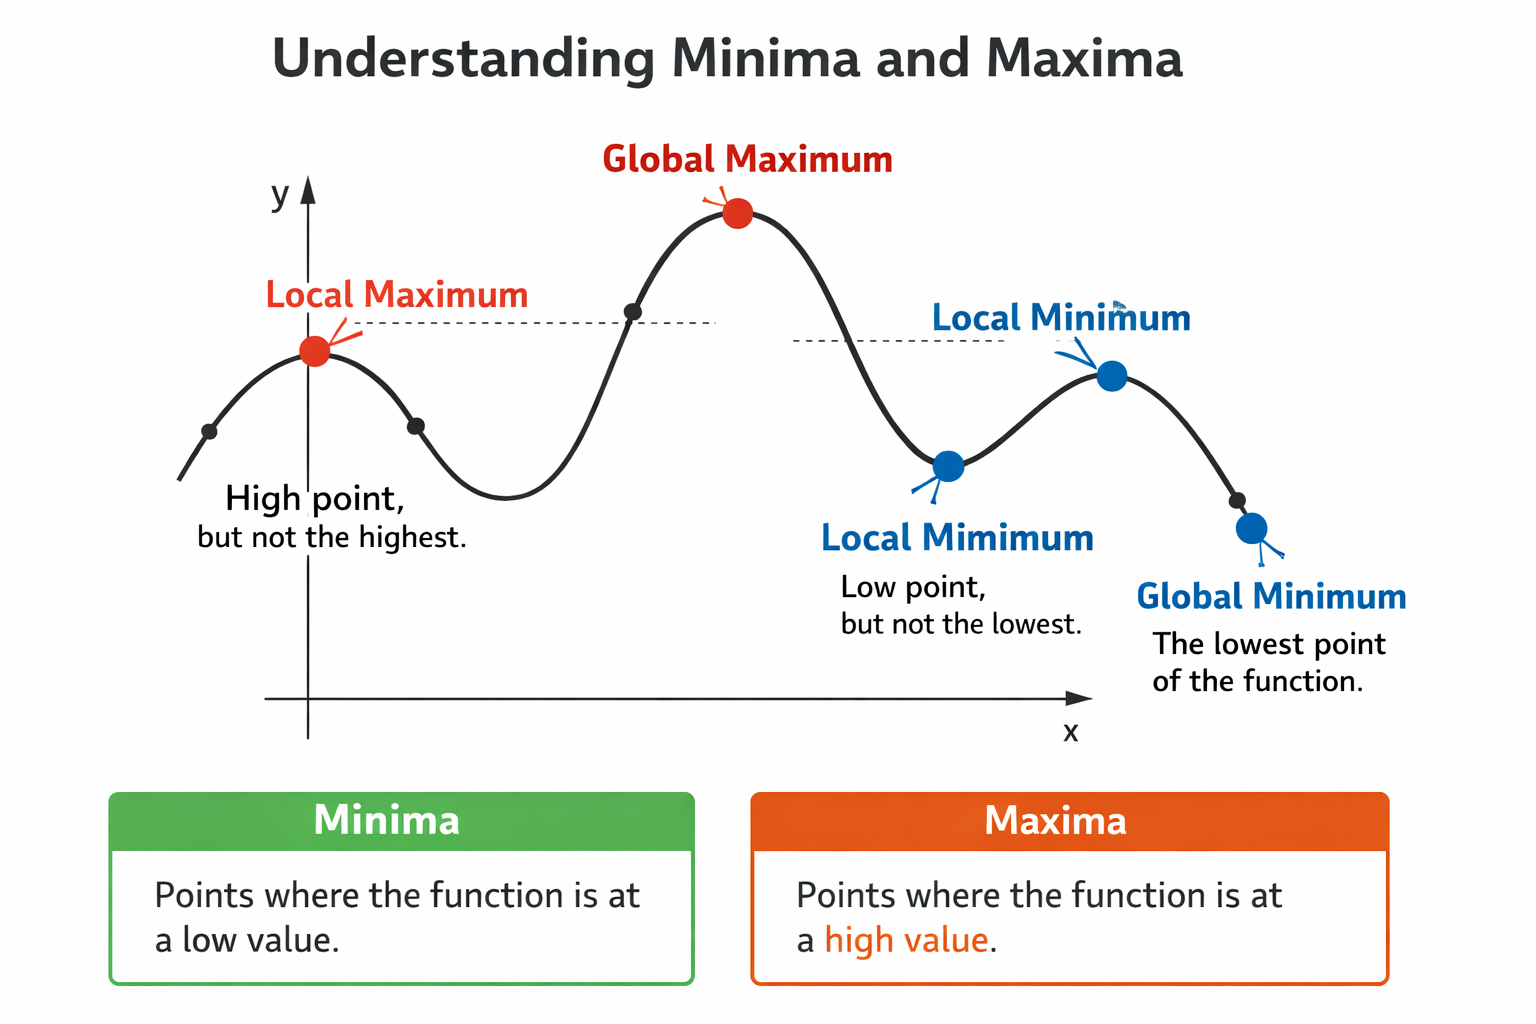

---

## **Minima and Maxima of a Function**

Let us consider a function:

$$
f(x)
$$

We are interested in finding points where the function reaches:

* A **minimum** (lowest value)
* A **maximum** (highest value)

---

## **1. Critical Points**

A point ( x = c ) is called a **critical point** if:

$$
f'(c) = 0
$$

or

$$
f'(c) \text{ does not exist}
$$

In optimization (like Linear Regression), we usually focus on:

$$
f'(x) = 0
$$

Why?

Because the derivative represents the slope of the function.

* If slope > 0 → function increasing
* If slope < 0 → function decreasing
* If slope = 0 → flat point (possible minimum or maximum)

---

## **2. First Derivative Test (Slope Intuition)**

If around a point ( c ):

* ( f'(x) ) changes from **positive → negative**,
  then ( c ) is a **local maximum**.

* ( f'(x) ) changes from **negative → positive**,
  then ( c ) is a **local minimum**.

Intuition:

Increasing → Flat → Decreasing = Peak
Decreasing → Flat → Increasing = Valley

---

## **3. Second Derivative Test (Curvature Test)**

Once we find a critical point ( c ) such that:

$$
f'(c) = 0
$$

We compute the second derivative:

$$
f''(c)
$$

Then:

* If ( f''(c) > 0 ) → Local Minimum (curve opens upward ∪)
* If ( f''(c) < 0 ) → Local Maximum (curve opens downward ∩)
* If ( f''(c) = 0 ) → Inconclusive

This works because:

* ( f''(x) > 0 ) means function is **convex**
* ( f''(x) < 0 ) means function is **concave**

---

## **4. Example**

Consider:

$$
f(x) = x^2
$$

First derivative:

$$
f'(x) = 2x
$$

Set derivative to zero:

$$
2x = 0
$$

$$
x = 0
$$

Second derivative:

$$
f''(x) = 2
$$

Since:

$$
f''(0) = 2 > 0
$$

Therefore:

$$
x = 0 \text{ is a minimum}
$$

This makes sense because ( x^2 ) is a bowl-shaped function.

---

## **5. Why This Matters for Linear Regression**

In Linear Regression, we minimize:

$$
L(w, b)
$$

To find optimal parameters, we solve:

$$
\frac{\partial L}{\partial w} = 0
$$

$$
\frac{\partial L}{\partial b} = 0
$$

Because the MSE loss is **convex**, it has:

* One global minimum
* No local minima traps

That is why gradient descent works reliably.

---

# **Big Picture**

Minima and maxima are found by:

1. Taking derivatives
2. Setting them to zero
3. Checking curvature

Optimization in ML is simply calculus applied to loss functions.

---



## **Gradient of a Function**

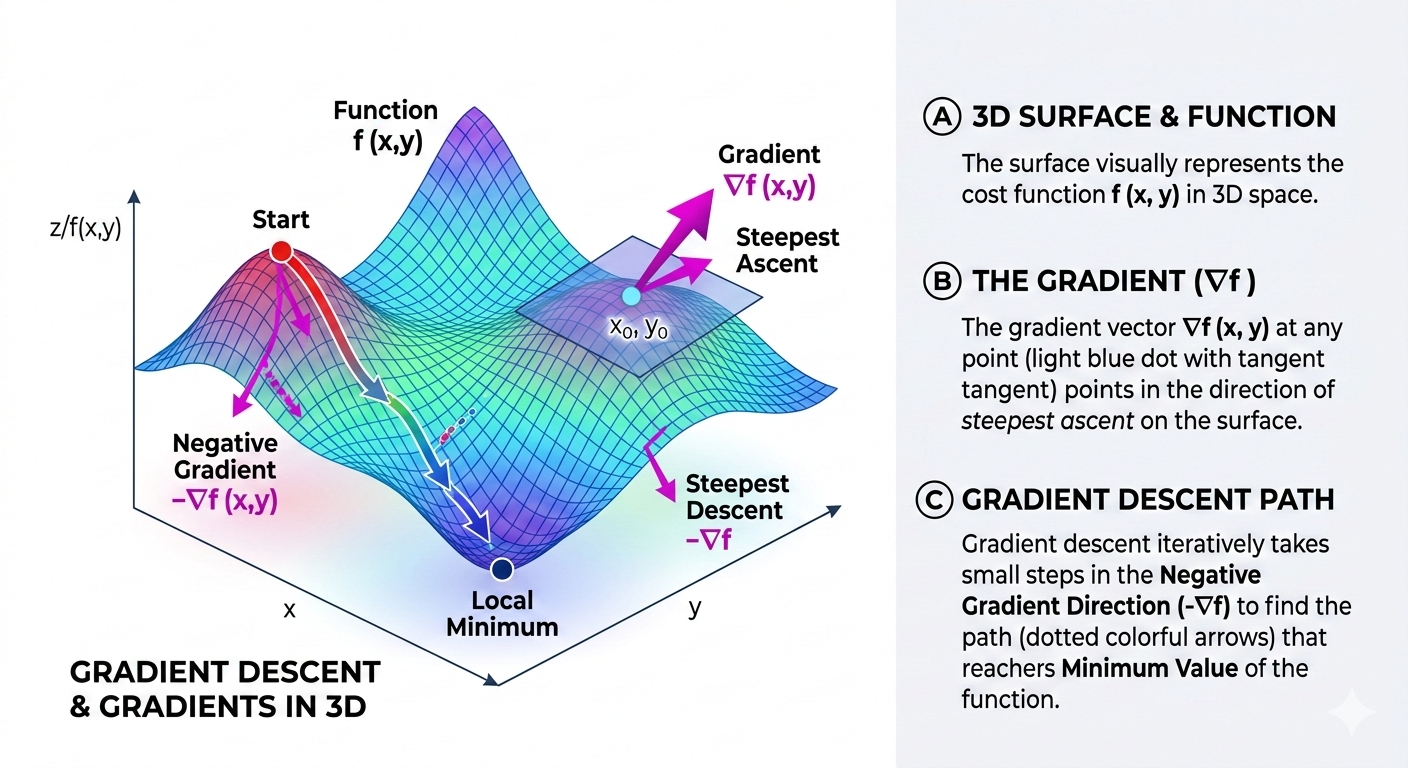





In one dimension, we use the derivative:

$$
f'(x)
$$

But in machine learning, our function usually depends on multiple variables:

$$
f(x_1, x_2, ..., x_n)
$$

In this case, we use the **gradient**.

---

## **1. Definition of Gradient**

For a function:

$$
f(x_1, x_2, ..., x_n)
$$

The gradient is the vector of partial derivatives:

$$
\nabla f =
\begin{bmatrix}
\frac{\partial f}{\partial x_1} \
\frac{\partial f}{\partial x_2} \
\vdots \
\frac{\partial f}{\partial x_n}
\end{bmatrix}
$$

The symbol ( \nabla ) (nabla) represents the gradient operator.

---

## **2. What Does the Gradient Represent?**

The gradient tells us:

* The direction of **steepest increase**
* How fast the function increases in that direction

If:

$$
\nabla f = 0
$$

Then we are at a critical point (possible minimum or maximum).

---

## **3. Simple Example**

Let:

$$
f(x, y) = x^2 + y^2
$$

Compute partial derivatives:

$$
\frac{\partial f}{\partial x} = 2x
$$

$$
\frac{\partial f}{\partial y} = 2y
$$

So the gradient is:

$$
\nabla f =
\begin{bmatrix}
2x \
2y
\end{bmatrix}
$$

To find critical points:

$$
\nabla f = 0
$$

Which gives:

$$
2x = 0, \quad 2y = 0
$$

So:

$$
x = 0, \quad y = 0
$$

This is the global minimum.

---

## **4. Why Gradient Matters in Machine Learning**

In Linear Regression, the loss depends on parameters:

$$
L(w, b)
$$

Since there are multiple parameters, we compute:

$$
\nabla L =
\begin{bmatrix}
\frac{\partial L}{\partial w} \
\frac{\partial L}{\partial b}
\end{bmatrix}
$$

Gradient Descent updates parameters using:

$$
\theta := \theta - \alpha \nabla L
$$

Where:

* ($ \theta $) is the parameter vector
* ($ \alpha $) is the learning rate

We move in the **negative gradient direction** because:

* The gradient points toward steepest increase
* We want steepest decrease

---

## **5. Geometric Intuition**

Think of a 3D surface (like a bowl).

At any point:

* The gradient is an arrow
* It points uphill
* Its length tells how steep the slope is

Gradient Descent simply walks downhill step by step.

---

## **Big Picture**

Derivative → slope in 1D
Gradient → slope vector in multiple dimensions

Optimization in ML = following the negative gradient until we reach a minimum.

---





We now connect everything.

# **Gradient Descent**

We want to minimize the loss function:

$$
L(w, b) = \frac{1}{m} \sum_{i=1}^{m} \left(y_i - (w x_i + b)\right)^2
$$

Since ( $L(w,b)$ ) depends on two variables, we compute its gradient:

$$
\nabla L =
\begin{bmatrix}
\frac{\partial L}{\partial w} \
\frac{\partial L}{\partial b}
\end{bmatrix}
$$

---

## **1. Compute the Partial Derivatives**

Derivative with respect to ( w ):

$$
\frac{\partial L}{\partial w} -\frac{2}{m}
\sum_{i=1}^{m}
x_i \left(y_i - (w x_i + b)\right)
$$

Derivative with respect to ( b ):

$$
\frac{\partial L}{\partial b} -\frac{2}{m}
\sum_{i=1}^{m}
\left(y_i - (w x_i + b)\right)
$$

These tell us:

* How sensitive the loss is to changes in ($ w $)
* How sensitive the loss is to changes in ($ b $)

---

## **2. Gradient Descent Update Rule**

We update parameters in the **negative gradient direction**:

$$
w := w - \alpha \frac{\partial L}{\partial w}
$$

$$
b := b - \alpha \frac{\partial L}{\partial b}
$$

Where:

* ($ \alpha $) is the learning rate
* It controls step size

---

## **3. Why Negative Gradient?**

* The gradient ($ \nabla L $) points toward steepest increase.
* We want to minimize the loss.
* So we move in the opposite direction.

Geometrically:

If the loss surface is a bowl (convex),
gradient descent walks downhill toward the minimum.

---




# **Implementation of Gradient Descent**

In [5]:
# Start with RANDOM parameters
np.random.seed(17)
w = np.random.randn()
b = np.random.randn()

learning_rate = 0.01
epochs = 100

m = len(X_train)

# Store parameter history
w_history = [1,2,7]# Starting with random weights to vizualise the best fit line later
b_history = [1,12,1]
loss_history = []
for epoch in range(epochs):

    y_pred = w * X_train.flatten() + b

    loss = np.mean((y_train - y_pred)**2)

    dw = (-2/m) * np.sum(X_train.flatten() * (y_train - y_pred))
    db = (-2/m) * np.sum(y_train - y_pred)

    w = w - learning_rate * dw
    b = b - learning_rate * db

    w_history.append(w)
    b_history.append(b)
    loss_history.append(loss)

print("Final w:", w)
print("Final b:", b)

Final w: 2.850239200018271
Final b: 5.512117467970313


In [6]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

fig, ax = plt.subplots(figsize=(8,6))
x_line = np.linspace(-12, 12, 100)

def update(frame):
    ax.clear()

    w = w_history[frame]
    b = b_history[frame]

    y_line = w * x_line + b

    ax.scatter(X, y, alpha=0.6)
    ax.plot(x_line, y_line,color="red")

    ax.set_xlim(-12, 12)
    ax.set_ylim(min(y)-10, max(y)+10)
    ax.set_title(f"Epoch {frame+1}")

ani = FuncAnimation(fig, update, frames=len(w_history), interval=250)
plt.close(fig)
HTML(ani.to_jshtml())

## **Gradient Descent in Action**

The animation visualizes how gradient descent optimizes the parameters $w$ and
$b$ of the linear regression model.
![Gradient Descent Animation](https://github.com/vishal786-commits/machine-learning-journey/blob/main/classical-ml/assets/gradient_descent.gif?raw=1)

**What This Visually Demonstrates**

* Optimization is iterative

* Parameters move gradually, not magically

* Gradient descent is geometric (downhill movement)

* Loss surface is convex (only one global minimum)

* Random initialization still converges (for convex problems)

**In summary, This animation visualizes gradient descent searching the parameter space to minimize mean squared error and find the best-fitting line.**

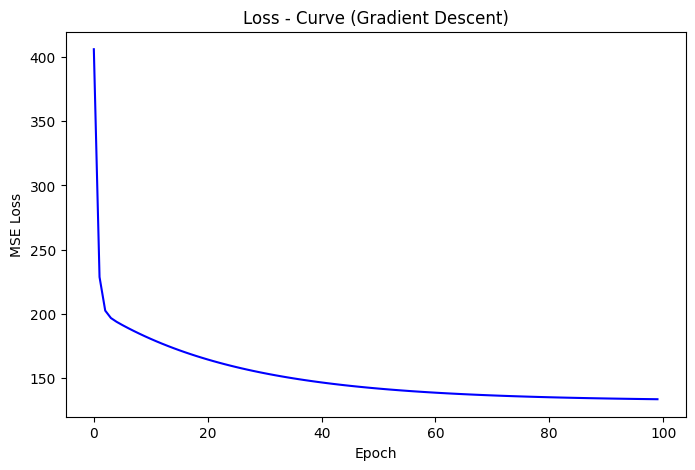

In [7]:
plt.figure(figsize=(8,5))
plt.plot(loss_history, color="blue")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Loss - Curve (Gradient Descent)")
plt.show()


## **Interpretation of the Loss Curve**

The loss curve shows the Mean Squared Error (MSE) as a function of training epochs.

Key observations:

1. **Rapid Initial Decrease**
   The steep drop at the beginning indicates that the parameters were far from optimal, and early gradient steps significantly reduced the error.

2. **Gradual Slope Reduction**
   As training progresses, the magnitude of the gradient decreases. The updates become smaller because the model is approaching the minimum.

3. **Flattening of the Curve**
   The curve flattens as it nears convergence, indicating that:

   * The gradient is approaching zero.
   * The model is close to the global minimum.
   * Further updates produce only marginal improvements.


# **Evaluate on Test Data**


After training the model using gradient descent, we evaluated its performance on unseen test data.

The training MSE measures how well the model fits known data.

The test MSE measures how well the model generalizes.

If the training and test errors are similar, it indicates that the model has learned the true underlying relationship rather than memorizing noise.

This confirms that Linear Regression, when properly optimized, generalizes well on linear data with Gaussian noise.



In [8]:
# Predictions on training data
train_pred = w * X_train.flatten() + b
train_mse = np.mean((y_train - train_pred) ** 2)

# Predictions on test data
test_pred = w * X_test.flatten() + b
test_mse = np.mean((y_test - test_pred) ** 2)

print("Training MSE:", train_mse)
print("Test MSE:", test_mse)

Training MSE: 133.25219726560073
Test MSE: 135.5329429441334


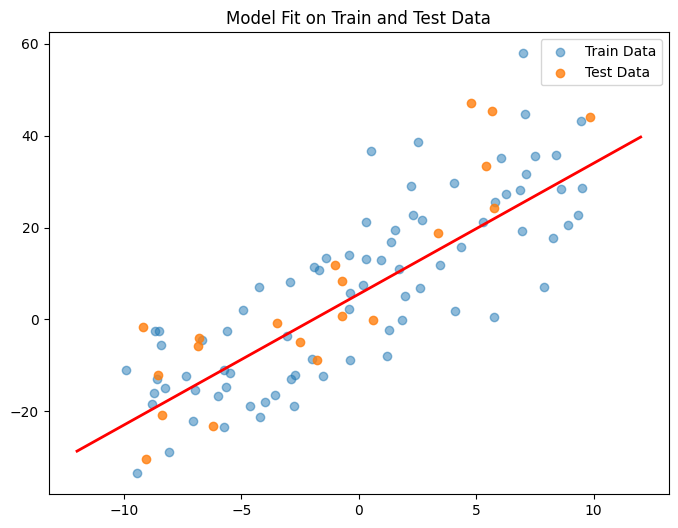

In [10]:
plt.figure(figsize=(8,6))

# Plot training points
plt.scatter(X_train, y_train, alpha=0.5, label="Train Data")

# Plot test points
plt.scatter(X_test, y_test, alpha=0.8, label="Test Data")

# Plot learned line
x_line = np.linspace(-12, 12, 100)
y_line = w * x_line + b
plt.plot(x_line, y_line, color="red", linewidth=2)

plt.legend()
plt.title("Model Fit on Train and Test Data")
plt.show()

# **Conclusion**

In this notebook, we built Linear Regression from first principles. We defined the loss function, derived its gradients, and implemented gradient descent to optimize the parameters $w$ and $b$.

Through visualization, we observed the regression line gradually converge toward the best fit, while the loss curve demonstrated smooth and stable minimization of the Mean Squared Error.

The final evaluation showed:

Training MSE ≈ 133.25

Test MSE ≈ 135.53

Since the training and test errors are very close, the model generalizes well and successfully captures the underlying linear relationship without overfitting.

This exercise demonstrates that Linear Regression is fundamentally an optimization problem solved using calculus, where gradient descent iteratively minimizes a convex loss function to find the global minimum.